In [2]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import neural_net_helper
%aimport neural_net_helper

nnh = neural_net_helper.NN_Helper()

nn_ch = neural_net_helper.Charts_Helper(save_dir="/tmp", visible=False)


In [4]:
# TensorFlow architecture drawing
# Create figure and axis
fig_tf_seq, ax_tf_seq = plt.subplots(figsize=(20,4))
_= nn_ch.tf_sequential_arch(ax_tf_seq)
plt.close(fig_tf_seq)

fig_tf_func, ax_tf_func = plt.subplots()
_= nn_ch.tf_functional_arch(ax_tf_func)
plt.close(fig_tf_func)

/home/kjp/Notebooks/NYU/neural_net_helper.py:288: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((i*spacing, 0), rect_width, rect_height, color='lightgrey', edgecolor='black')
/home/kjp/Notebooks/NYU/neural_net_helper.py:317: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((i*spacing, 0), rect_width, rect_height, color='lightgrey', edgecolor='black')


In [5]:
fig_tf_test, ax_tf_test = plt.subplots(figsize=(20,4))

num_layers=3
labels = [ "" ] *  num_layers
labels[0] = "Input\n$\mapsto n$"
labels[-2] = "$n  \mapsto | y_{(L-1)} |$"
labels[-1] = "Classifier\n $| y_{(L-1)} | \mapsto | C |$"
_= nn_ch.tf_sequential_arch(ax_tf_test, num_layers=num_layers, rect_width=1.0, rect_height=3.5, spacing=4.5,
                                   label_extra_vspace=0.5,
                                   labels=labels)

plt.close(fig_tf_test)

# Neural Network

A Neural Network (Sequential architecture) is composed of
-  sequence of Layers
    - layer $\ll$ transforms its input $\y_{(\ll-1)}$ to output $\y_\llp$
        - through a transformation: operation parameterized by weights $\W_\llp$

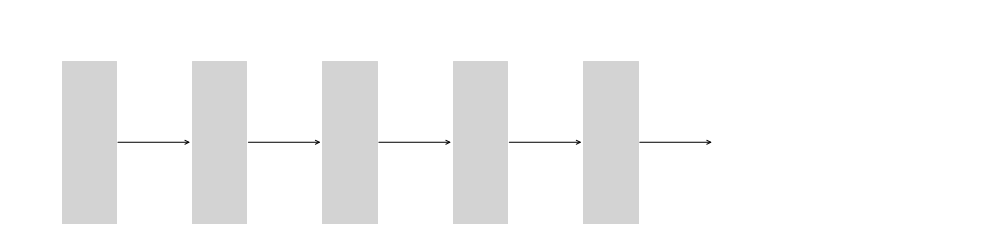

In [6]:
fig_tf_seq

- initial layer $0$ is Input layer: 
    - outputs the network's inputs $\x$
        $$\y_{(0)} = \x$$
- final layer $L$ transforms its input $\y_{(L-1)}$ to prediction $\hat\y$
$$
\hat\y = \y_{(L)}
$$
    - transformation of layer $L$ usually: Regression or Classification

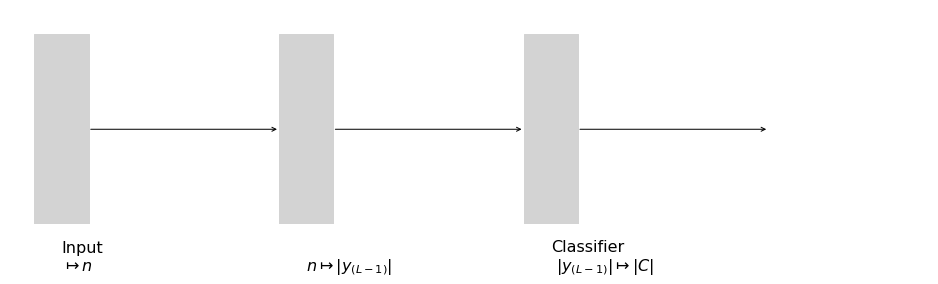

In [7]:
fig_tf_test

In the above diagram
- the central box represents a sequence of 1 or more layers
- a sub-network
- just for brevity

The Neural network thus computes a *function* from $\x$ to $\hat\y$.

The function *mimics* the training data
$$ \langle \X, \y \rangle= [ \x^\ip, \y^\ip | 1 \le i \le m ]$$

where each *example* $\langle \x^\ip, \y^\ip \rangle$ 
- describes the mapping of the function on input $\x^\ip$ to output $\y^\ip$
- e.g., from input features $\x^\ip$ to
    - continuous value $\y^\ip$
    - discrete class $\y^\ip$
        - really: output is a probability vector over finite set $C$ of discrete classes

<table>
    <tr>
        <td>
            <img src="images/surface_chart_1.png" width=75%>
        </td>
    </tr>
    <tr>
        <td>
            <img src="images/surface_chart_2.png"  width=75%>
        </td>
    </tr>
</table>

The Neural Network is trained ("learns") to mimic the training data
- by solving for the weights $\W_\llp$ of each layer $1 \le \ll \le L$
- that minimize a loss function
$$
\loss = \sum_{i-1}^m {\loss^\ip}
$$
- where $\loss^\ip$ if a function of
    - how much prediction $\hat\y^\ip$ deviates from true target/label $\y^\ip$
    
The minimization procedure is usually a variant of *Gradient Descent*

The challenge is that the operation of each layer $1 \le \ll \lt L$
- is usually not *interpretable*
- we can describe *how* it transforms $\y_{(\ll-1)}$ to $\y_\llp$
- but not *why* it is performing the transformation
    - objective (describe) rather than subjection (why)

So the sub-network in the diagram

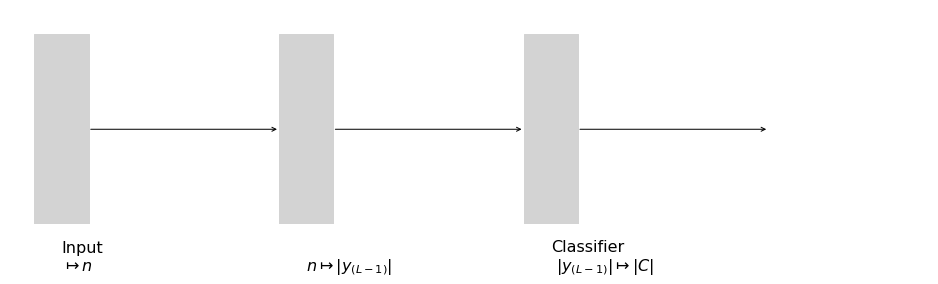

In [8]:
fig_tf_test

computes an *unknown* function
- from input of length $n$ (the raw input)
- to a vector of length $| \y_{(L-1)} |$

whose purpose is
- to make the final layer $L$ (e.g., the Classifier)
- create predictions (outputs)
- that have a very-low loss $\loss$
    - a good "approximation" of the function described by the training data

In [9]:
print("Done")

Done
